In [240]:
from sympy import *
from IPython.display import *
init_printing()

In [241]:
var('a:z')

In [242]:
def cpnd(E,k):
    d=E.shape[0]
    N=binomial(d,k)
    Z=list(subsets(range(d),k))
    return Matrix(N,N,lambda i,j: expand(det(E.extract(Z[i],Z[j]))))

In [243]:
def matsub(p,X):
    c=p.subs(x,0)
    q=(p-c).expand()
    d=X.shape[0]
    return simplify(c*eye(d)+q.subs(x,X))


In [244]:
def projs(X,p,ev):
    if p.subs(x,ev).simplify()!=0:
        return "not a root"
    q=simplify(p/(x-ev))
    qq=simplify(q/q.subs(x,ev))
    return matsub(qq,X)

    

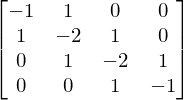

In [245]:
X=Matrix(4,4,[-1,1,0,0,1,-2,1,0,0,1,-2,1,0,0,1,-1])
X

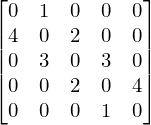

In [187]:
X=Matrix(5,5,[0,1,0,0,0,4,0,2,0,0,0,3,0,3,0,0,0,2,0,4,0,0,0,1,0])
X

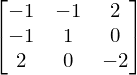

In [188]:
X=Matrix(3,3,[-1,-1,2,-1,1,0,2,0,-2])
X

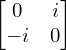

In [212]:
X=Matrix(2,2,[0,I,-I,0])
X

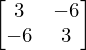

In [262]:
X=Matrix(2,2,[3,-6,-6,3])
X

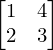

In [214]:
X=Matrix(2,2,[1,4,2,3])
X

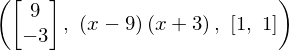

In [263]:
evs=Matrix(list(X.eigenvals().keys()))
minpoly=product(x-evs[k,0],(k,0,len(evs)-1))
evs,minpoly,list(X.eigenvals().values())

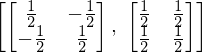

In [264]:
PROJS=[projs(X,minpoly,evs[k]) for k in range(len(evs))]
PROJS

In [265]:
pp=X.charpoly(t).diff(t)
dd=X.shape[0]
for i in range(len(evs)):
    display("eigenvalue ="+str(evs[i]))
    for j in range(dd):
        Y=X.minorMatrix(j,j)
        f=Y.charpoly(x)
        arg=evs[i]
        vijsquared=simplify(f.subs(x,arg)/pp.subs(t,arg))
        display(vijsquared)
        

'eigenvalue =9'

'eigenvalue =-3'

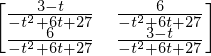

In [266]:
dd=X.shape[0]
simplify((t*eye(dd)-X).inv().expand())

In [267]:
dim=len(evs)
M=zeros(dd)
for i in range(dim):
    M=M+PROJS[i]
(M-eye(dd)).is_zero

True

In [268]:
M=zeros(dd)
for i in range(dim):
    M=M+evs[i]*PROJS[i]
print((M-X).is_zero)

True


In [269]:
Y=X.minor_submatrix(0,0)
evs=Matrix(list(Y.eigenvals().keys()))
minpoly=product(x-evs[k,0],(k,0,len(evs)-1)).expand()
Y,[simplify(evs[k]) for k in range(len(evs))]

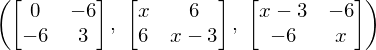

In [270]:
X[0,0]=0
X,cpnd(x*eye(dd)-X,dd-1),(x*eye(dd)-X).adjugate().expand()

=========================================================================

ZRS Example

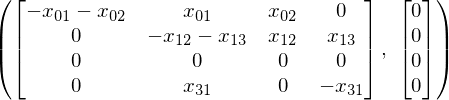

In [271]:
de=4
x=symbols('x:4:4')
X=Matrix(4,4,x)
X[0,2]=X[0,2];X[0,3]=0;
for i in range(1,4):
    X[i,0]=0

X[2,1]=0;X[2,3]=0;X[3,2]=0
U=Matrix(de,1,lambda i,j:1)
XU=X*U
Y=Matrix(de,de,lambda i,j: XU[i,0] if i==j else 0)
Z=X-Y
Z,Z*U

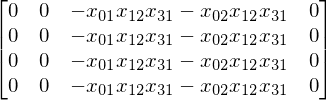

In [272]:
Z.adjugate().expand()

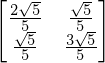

In [200]:
M=((1/sqrt(5))*Matrix([[2,1],[1,3]]))
M

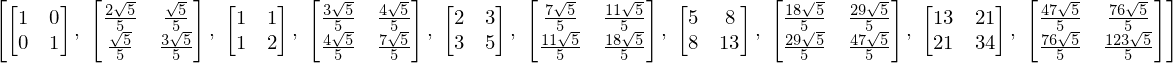

In [201]:
[simplify(M**i) for i in range(10)]

* [x] h
* [ ] k
* [x] l

|A|B|
|---|---|
|c|d|